<H1>Dataset Loading and Interaction Extraction</h1>

In [113]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [114]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [115]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [116]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2166 training examples
508 test examples


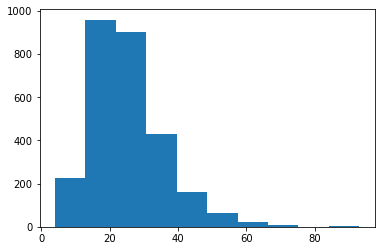

In [117]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))



trainSetRaw = [x for x in trainSetRaw if len(x.words)<=48]
testSetRaw = [x for x in testSetRaw if len(x.words)<=48]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [118]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    for interaction in example.interactions:
        #print(example.words)
        #print(interaction)        
        sentence = interaction[0] + " " + interaction[1] + " " + " ".join(example.words)
        #print(sentence)
        #print(type(sentence))
        trainSet = trainSet + [sentence]
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        #print()
        
print(len(trainSet))
print(len(trainLabel))

10238
10238


In [119]:
testSet = []
testLabel = []

for example in testSetRaw:
    for interaction in example.interactions:
        #print(example.words)
        #print(interaction)        
        sentence = interaction[0] + " " + interaction[1] + " " + " ".join(example.words)
        #print(sentence)
        #print(type(sentence))
        testSet = testSet + [sentence]
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        #print()
        
print(len(testSet))
print(len(testLabel))

2274
2274
